In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [ ]:
df=pd.read_excel('Spam Tweets 03march.xlsx')
df

,tweet_full_text,tweet_source_url,Type
0,"Dear Florent,\n\nYou never gave â€œmassageâ€ ...",http://www.linkedin.com/,Ham
1,RT @oneleggoalie: This email and domain\n(55z4...,https://help.twitter.com/en/using-twitter/how-...,Ham
2,RT @oneleggoalie: This email and domain\n(55z4...,https://mobile.twitter.com,Ham
3,RT @HB9VQQ: Who is ready for a change and want...,https://twitter.com,Ham
4,18 Things To Know For Better Email Deliverabil...,https://mobile.twitter.com,Ham
...,...,...,...
997,RT @PenFarthing: Hi all; please avoid this web...,http://twitter.com/#!/download/ipad,Ham
998,RT @PenFarthing: Hi all; please avoid this web...,http://twitter.com/#!/download/ipad,Ham
999,"RT @Xacoli_nft: ""Zspam"" SPAM VINTAGE (10/10)\n...",https://mobile.twitter.com,Ham
1000,RT @SiteGround: Protecting oneself from #Phish...,https://thechrisbertsch.com,Ham


In [ ]:
df['Type']=df.Type.map(dict(Ham=0, Spam=1))

In [ ]:
import pandas as pd # our main data management package
import string # used for preprocessing
import re # used for preprocessing
import nltk # the Natural Language Toolkit, used for preprocessing
import numpy as np # used for managing NaNs
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression # our model
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### Vocabulary size
voc_size=5000

In [ ]:
y=df['Type']
x=df[['tweet_source_url','tweet_full_text']]

In [ ]:
import tensorflow as tf

In [ ]:
messages=x.copy()
messages['tweet_source_url'][1]

'https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels'

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', str(messages['tweet_source_url'][i]).replace('nan', '') + ' ' + str(messages['tweet_full_text'][i]).replace('nan', ''))
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the preprocessed text data
X = vectorizer.fit_transform(corpus)

# Print the shape of the resulting matrix
print(X.shape)


(1002, 3735)


In [ ]:

import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# Initialize the stemmer and stop words
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define a function to preprocess a single tweet
def preprocess_tweet(tweet):
    # Remove URLs, mentions, and non-alphanumeric characters
    tweet = re.sub(r"http\S+|www\S+|@[^\s]+|\W", " ", tweet)

    # Convert to lowercase and split into words
    words = tweet.lower().split()

    # Remove stop words and stem the remaining words
    stemmed_words = [ps.stem(word) for word in words if word not in stop_words]

    # Join the stemmed words back into a single string
    preprocessed_tweet = " ".join(stemmed_words)

    return preprocessed_tweet

# Combine the 'tweet_source_url' and 'tweet_full_text' columns into a single string
combined_tweets = df['tweet_source_url'].fillna('') + ' ' + df['tweet_full_text'].fillna('')

# Apply the preprocessing function to each combined tweet in the dataframe
corpus = [preprocess_tweet(tweet) for tweet in combined_tweets]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

# Drop the rows with missing or NaN values in the 'Type' column
df.dropna(subset=['Type'], inplace=True)

# Define the target variable
y = df['Type']

# Create a CountVectorizer object to convert the corpus into a bag-of-words representation
vectorizer = CountVectorizer()
# Store the vectorizer using pickle
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# Convert the preprocessed corpus into a bag-of-words representation
X = vectorizer.fit_transform(corpus)

# Split the data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)
# Create a logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate the accuracy of the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Make predictions on the test data
y_test_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


# Make predictions on the validation data
y_val_pred = model.predict(X_val)

# Calculate the accuracy of the model on the validation data
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)


Train Accuracy: 0.9800249687890137
Test Accuracy: 0.9702970297029703
Validation Accuracy: 0.96


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate a classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        97
           1       1.00      0.25      0.40         4

    accuracy                           0.97       101
   macro avg       0.98      0.62      0.69       101
weighted avg       0.97      0.97      0.96       101



In [ ]:
import tweepy
import nltk
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Authenticate to Twitter
auth = tweepy.OAuthHandler("MdYOUIicVBOhh5MWLtshjq699", "lSGphKYSKWH983PsMA1YvIzw6m5crzRLapcMrlR6jPzxcuXDZK")
auth.set_access_token("1583397562677350402-AIBoieiNn2SzLGnnoCiACmWj8Proer", "tMiBET4jvFUEqqNC78Y2qeBD5rtYanlvBteIOWf0ereYB")

# Create API object
api = tweepy.API(auth)

# Define the query parameters
query = "COVID-19"
max_tweets = 100

# Search for tweets
tweets = tweepy.Cursor(api.search_tweets, q=query, tweet_mode='extended').items(max_tweets)

# Preprocess the tweets
preprocessed_tweets = []
for tweet in tweets:
    # Extract the full text of the tweet
    tweet_text = tweet.full_text

    # Tokenize the tweet text
    tokens = nltk.word_tokenize(tweet_text)

    # Remove stop words and punctuation
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]

    # Join the filtered tokens back into a single string
    preprocessed_tweet = ' '.join(filtered_tokens)

    # Append the preprocessed tweet to the list
    preprocessed_tweets.append(preprocessed_tweet)

# Load the pre-trained model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the vectorizer used during training
with open('vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

# Fit the vectorizer on the preprocessed tweets
vectorizer.fit(preprocessed_tweets)

# Transform the preprocessed tweets using the same vectorizer
X = vectorizer.transform(preprocessed_tweets)

# Make predictions using the pre-trained model
predictions = model.predict(X)

# Print the predictions
print(predictions)


ValueError: ignored

In [ ]:
# Preprocess the tweet data
preprocessed_tweets = preprocess_tweets(tweet_list)

if len(preprocessed_tweets) == 0:
    print("No relevant tweets found.")
else:
    # Convert the preprocessed tweets to a numpy array
    X = np.array(preprocessed_tweets)

    # Use the pre-trained model to make predictions on the new data
    try:
        predictions = model.predict(X)
        print(predictions)
    except Exception as e:
        print("Error predicting sentiment:", e)


No relevant tweets found.


In [ ]:
import seaborn as sns

<Axes: ylabel='count'>

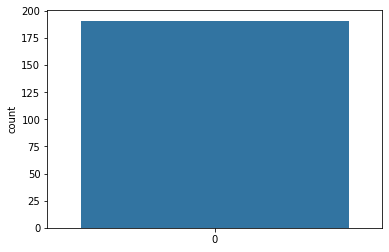

In [ ]:
sns.countplot(predictions,label='count')

In [ ]:
# Add a new column to the dataframe with the predicted labels
msg['Predictions'] = predictions

In [ ]:
msg

,Text,Predictions
0,"Another day, another text from ""Amazon"" tellin...",0
1,Twitter as an official media handle without ju...,0
2,The #spam here on #Twitter is truly a problem....,0
3,after reporting 50 different accounts will #tw...,0
4,@cars24india you guys suck to the core !! Ther...,0
...,...,...
186,@afronews Errybody...🗣DON'T CLICK this #Link i...,0
187,RT @Cyberdost: Directions given by @TRAI to cu...,0
188,"@ViCustomerCare Well, not incontinent yet even...",0
189,T-9\n\n18-03-2023 will be written in golden wo...,0


In [ ]:
# Replace 0s with 'ham' and 1s with 'spam'
msg['Predictions'] = msg['Predictions'].replace({0: 'ham', 1: 'spam'})

# Print the updated dataframe
print(msg)


                                                  Text Predictions
0    RT @d4d_Swan: 1. Post the cover of a great alb...         ham
1    RT @SeegerN: What good is your email if it nev...         ham
2    RT @Xacoli_nft: #SPAMART TODAY (4/5)\nGotspamz...         ham
3    @DentonKollar I'm warning everyone. Remove thi...         ham
4    Hey @elon, in my experience #twitter #advertis...         ham
..                                                 ...         ...
795  Hey @Twitter why do you make reporting #spam h...         ham
796  IF YOU GET AN "INSTAGRAM" LINK TO "YOUR" PROFI...         ham
797  Elon Musk @elonmusk you claimed that you would...         ham
798  @ROCareIndia @ROCareIndia stop sending #spam #...         ham
799  Phone call:\nHello ma’am I am from blah blah \...         ham

[800 rows x 2 columns]


In [ ]:
msg.head(20)

,Text,Predictions
0,RT @d4d_Swan: 1. Post the cover of a great alb...,ham
1,RT @SeegerN: What good is your email if it nev...,ham
2,RT @Xacoli_nft: #SPAMART TODAY (4/5)\nGotspamz...,ham
3,@DentonKollar I'm warning everyone. Remove thi...,ham
4,"Hey @elon, in my experience #twitter #advertis...",ham
5,"1. Post the cover of a great album, no need to...",ham
6,RT @emma_atwood: @healthnhealthyr My husband t...,ham
7,RT @Xacoli_nft: #SPAMART TODAY (4/5)\nGotspamz...,ham
8,RT @Codex_Infinity: Retweet this and message m...,ham
9,Send me a message if a stranger is following y...,ham


In [ ]:
num_spam = len(msg[msg['Predictions'] == 'spam'])
num_ham = len(msg[msg['Predictions'] == 'ham'])

print('Number of spam messages:', num_spam)
print('Number of ham messages:', num_ham)


Number of spam messages: 13
Number of ham messages: 787


In [ ]:
import pandas as pd

# Placing the above accuracy values
train_acc = 0.98
test_acc = 0.97
val_acc = 0.96

# create a dictionary to store the accuracy values
accuracy = {'Dataset': ['Train', 'Test', 'Validation'],
            'Accuracy': [train_acc, test_acc, val_acc]}

# create a dataframe from the dictionary
accuracy_df = pd.DataFrame(accuracy)

# display the dataframe
print(accuracy_df)


      Dataset  Accuracy
0       Train      0.98
1        Test      0.97
2  Validation      0.96


In [ ]:
import pandas as pd
from tabulate import tabulate

# assuming you have the accuracy values stored in variables
train_acc = 0.98
test_acc = 0.97
val_acc = 0.96

# create a dictionary to store the accuracy values
accuracy = {'Dataset': ['Train', 'Test', 'Validation'],
            'Accuracy': [train_acc, test_acc, val_acc]}

# create a dataframe from the dictionary
accuracy_df = pd.DataFrame(accuracy)

# display the dataframe as a table using the tabulate library
print(tabulate(accuracy_df, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════╤════════════╕
│    │ Dataset    │   Accuracy │
╞════╪════════════╪════════════╡
│  0 │ Train      │       0.98 │
├────┼────────────┼────────────┤
│  1 │ Test       │       0.97 │
├────┼────────────┼────────────┤
│  2 │ Validation │       0.96 │
╘════╧════════════╧════════════╛
